In [17]:
"""
================================================================================
ANÁLISE DE ADMISSÕES - FEUAN 2025-2026
================================================================================
Autor: Equipe de Análise de Dados
Data: Outubro 2025
Descrição: Análise completa do processo de admissão ao ensino superior,
           focando na relação entre formação prévia e sucesso no exame.
================================================================================
"""


'\n================================================================================\nANÁLISE DE ADMISSÕES - FEUAN 2025-2026\n================================================================================\nAutor: Equipe de Análise de Dados\nData: Outubro 2025\nDescrição: Análise completa do processo de admissão ao ensino superior,\n           focando na relação entre formação prévia e sucesso no exame.\n================================================================================\n'

### BLOCO 1: IMPORTAÇÃO DE BIBLIOTECAS


In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configurações globais
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

print(" Bibliotecas importadas com sucesso!")
print(f"   Pandas: {pd.__version__}")
print(f"   NumPy: {np.__version__}")


 Bibliotecas importadas com sucesso!
   Pandas: 2.3.3
   NumPy: 2.3.3


### BLOCO 2: CARREGAMENTO E PREPARAÇÃO DOS DADOS


In [19]:

def carregar_dados(caminho_arquivo: str) -> pd.DataFrame:
    """
    Carrega e prepara os dados do arquivo Excel.
    
    Parameters:
    -----------
    caminho_arquivo : str
        Caminho para o arquivo Excel
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com os dados carregados e limpos
    """
    try:
        # Carregar dados
        df = pd.read_excel(
            caminho_arquivo, 
            sheet_name='Registro de Acesso 2025-2026'
        )
        
        # Limpeza básica
        df.columns = df.columns.str.strip()
        
        # Padronizar coluna de admissão
        if 'Admissão' in df.columns:
            df['Admissão'] = df['Admissão'].str.strip()
        
        print(f"\n{'='*70}")
        print(" DADOS CARREGADOS COM SUCESSO")
        print(f"{'='*70}")
        print(f" Total de registros: {len(df):,}")
        print(f" Total de colunas: {len(df.columns)}")
        print(f"{'='*70}\n")
        
        return df
        
    except FileNotFoundError:
        print(f" Erro: Arquivo '{caminho_arquivo}' não encontrado!")
        return None
    except Exception as e:
        print(f" Erro ao carregar dados: {str(e)}")
        return None


# Carregar os dados
CAMINHO_ARQUIVO = 'feuan.xlsx'
df = carregar_dados(CAMINHO_ARQUIVO)

# Visualizar primeiras linhas
if df is not None:
    display(df.head())



 DADOS CARREGADOS COM SUCESSO
 Total de registros: 8,295
 Total de colunas: 22



,Número do Ordem,Sexo,Idade,Data de Nascimento,Província Residência,Município de residência,País de Origem,Período de Estudo,Unidade Organica,Nome do Curso Inscrito no Ensino Superior,Nota do Exame de Acesso,Admissão,Matriculados pela 1º vez,Necessidade de Educação Especial,Procedência Escolar do Ensino Médio,Natureza da Escola de Proveniência,Nome do Curso do Ensino Médio,Média Final no Ensino Médio,Financiamento dos Estudos no Ensino Médio,Trabalhador,Telefone,Email
0,0002,MASCULINO,24.00,2001-04-14,LUANDA,NaN,ANGOLA,REGULAR,ENGENHARIA,Engenharia Informática,1.99,Não,NaN,NaN,COLÉGIO MARA E LU,INFORMÁTICA,INFORMÁTICA,NaN,NaN,NaN,NaN,NaN
1,0005,MASCULINO,19.00,2006-06-27,LUANDA,NaN,ANGOLA,REGULAR,ENGENHARIA,Engenharia Civil,2.52,Não,NaN,NaN,"INSTITUTO MÉDIO POLITÉCNICO ""PASCOAL LUVUALU""",CONSTRUÇÃO CIVÍL,CONSTRUÇÃO CIVÍL,NaN,NaN,NaN,NaN,NaN
2,0011,MASCULINO,24.00,2001-09-01,LUANDA,NaN,ANGOLA,REGULAR,ENGENHARIA,Engenharia Electrónica e Telecomunicações,2.97,Não,NaN,NaN,INSTITUTO POLITÉCNICO Nº 2039 - 30 DE SETEMBRO,INFORMÁTICA,INFORMÁTICA,NaN,NaN,NaN,NaN,NaN
3,0019,MASCULINO,20.00,2005-03-22,LUANDA,NaN,ANGOLA,REGULAR,ENGENHARIA,Engenharia Civil,4.51,Não,NaN,NaN,INSTITUTO MÉDIO POLITÉCNICO ALDA LARA,DESENHADOR PROJECTISTA,DESENHADOR PROJECTISTA,NaN,NaN,NaN,NaN,NaN
4,0031,MASCULINO,21.00,2004-07-10,LUANDA,NaN,ANGOLA,REGULAR,ENGENHARIA,Engenharia Mecânica,10.00,Sim,NaN,NaN,INSTITUTO MÉDIO INDUSTRIAL DE LUANDA,ENGENHARIA MECANICA,ENGENHARIA MECANICA,NaN,NaN,NaN,NaN,NaN




### BLOCO 3: ANÁLISE EXPLORATÓRIA INICIAL


In [50]:

def analise_exploratoria(df: pd.DataFrame) -> None:
    """
    Realiza análise exploratória inicial dos dados.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
    """
    print(f"\n{'='*70}")
    print("🔍 ANÁLISE EXPLORATÓRIA DOS DADOS")
    print(f"{'='*70}\n")
    
    # Informações gerais
    print(" Estrutura do Dataset:")
    print(df.info())
    
    # Valores nulos
    print(f"\n{'='*70}")
    print(" VALORES NULOS POR COLUNA")
    print(f"{'='*70}\n")
    
    nulos = df.isnull().sum()
    percentual = (nulos / len(df) * 100).round(2)
    
    df_nulos = pd.DataFrame({
        'Coluna': nulos.index,
        'Valores_Nulos': nulos.values,
        'Percentual (%)': percentual.values
    })
    
    df_nulos_filtrado = df_nulos[df_nulos['Valores_Nulos'] > 0].sort_values(
        'Valores_Nulos', 
        ascending=False
    )
    
    if len(df_nulos_filtrado) > 0:
        display(df_nulos_filtrado)
    else:
        print(" Não há valores nulos no dataset!")
    
    # Estatísticas descritivas
    print(f"\n{'='*70}")
    print(" ESTATÍSTICAS DESCRITIVAS")
    print(f"{'='*70}\n")
    display(df.describe())


# Executar análise exploratória
if df is not None:
    analise_exploratoria(df)



🔍 ANÁLISE EXPLORATÓRIA DOS DADOS

 Estrutura do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8295 entries, 0 to 8294
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Número do Ordem                            2610 non-null   object 
 1   Sexo                                       2608 non-null   object 
 2   Idade                                      2608 non-null   float64
 3   Data de Nascimento                         2608 non-null   object 
 4   Província Residência                       2603 non-null   object 
 5   Município de residência                    0 non-null      float64
 6   País de Origem                             2608 non-null   object 
 7   Período de Estudo                          2610 non-null   object 
 8   Unidade Organica                           2608 non-null   object 
 9   Nome do Curso Inscrito no Ensino Super

,Coluna,Valores_Nulos,Percentual (%)
5,Município de residência,8295,100.00
18,Financiamento dos Estudos no Ensino Médio,8295,100.00
21,Email,8295,100.00
20,Telefone,8295,100.00
13,Necessidade de Educação Especial,8295,100.00
12,Matriculados pela 1º vez,8295,100.00
17,Média Final no Ensino Médio,8295,100.00
19,Trabalhador,8295,100.00
4,Província Residência,5692,68.62
3,Data de Nascimento,5687,68.56



 ESTATÍSTICAS DESCRITIVAS



,Idade,Município de residência,Nota do Exame de Acesso,Matriculados pela 1º vez,Necessidade de Educação Especial,Média Final no Ensino Médio,Financiamento dos Estudos no Ensino Médio,Trabalhador,Telefone,Email
count,2608.00,0.00,2608.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,24.50,NaN,5.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16.80,NaN,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00,NaN,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.00,NaN,2.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,21.00,NaN,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,23.00,NaN,8.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,125.00,NaN,16.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN




### BLOCO 4: ESTATÍSTICAS GERAIS DE ADMISSÃO


In [ ]:


def estatisticas_gerais(df: pd.DataFrame) -> dict:
    """
    Calcula estatísticas gerais de admissão.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
        
    Returns:
    --------
    dict
        Dicionário com estatísticas gerais
    """
    total_candidatos = len(df)
    total_admitidos = (df['Admissão'] == 'Sim').sum()
    total_nao_admitidos = (df['Admissão'] == 'Não').sum()
    taxa_admissao = (total_admitidos / total_candidatos * 100)
    
    # Estatísticas de notas
    nota_media_geral = df['Nota do Exame de Acesso'].mean()
    nota_media_admitidos = df[df['Admissão'] == 'Sim']['Nota do Exame de Acesso'].mean()
    nota_media_nao_admitidos = df[df['Admissão'] == 'Não']['Nota do Exame de Acesso'].mean()
    diferenca_notas = nota_media_admitidos - nota_media_nao_admitidos
    
    # Estatísticas demográficas
    masculino = (df['Sexo'] == 'MASCULINO').sum()
    feminino = (df['Sexo'] == 'FEMININO').sum()
    idade_media = df['Idade'].mean()
    
    stats = {
        'total_candidatos': total_candidatos,
        'total_admitidos': total_admitidos,
        'total_nao_admitidos': total_nao_admitidos,
        'taxa_admissao': taxa_admissao,
        'nota_media_geral': nota_media_geral,
        'nota_media_admitidos': nota_media_admitidos,
        'nota_media_nao_admitidos': nota_media_nao_admitidos,
        'diferenca_notas': diferenca_notas,
        'masculino': masculino,
        'feminino': feminino,
        'idade_media': idade_media
    }
    
    # Exibir estatísticas
    print(f"\n{'='*70}")
    print(" ESTATÍSTICAS GERAIS DE ADMISSÃO")
    print(f"{'='*70}\n")
    
    print(f" CANDIDATOS:")
    print(f"   Total: {total_candidatos:,}")
    print(f"   ✅ Admitidos: {total_admitidos:,} ({taxa_admissao:.2f}%)")
    print(f"   ❌ Não Admitidos: {total_nao_admitidos:,} ({100-taxa_admissao:.2f}%)")
    
    print(f"\n NOTAS DO EXAME:")
    print(f"   Média Geral: {nota_media_geral:.2f}")
    print(f"   Média Admitidos: {nota_media_admitidos:.2f}")
    print(f"   Média Não Admitidos: {nota_media_nao_admitidos:.2f}")
    print(f"   Diferença: {diferenca_notas:.2f} pontos")
    
    print(f"\n PERFIL DEMOGRÁFICO:")
    print(f"   Masculino: {masculino:,} ({masculino/total_candidatos*100:.1f}%)")
    print(f"   Feminino: {feminino:,} ({feminino/total_candidatos*100:.1f}%)")
    print(f"   Idade Média: {idade_media:.1f} anos")
    
    print(f"\n{'='*70}\n")
    
    return stats


# Calcular estatísticas gerais
if df is not None:
    stats_gerais = estatisticas_gerais(df)



📊 ESTATÍSTICAS GERAIS DE ADMISSÃO

📈 CANDIDATOS:
   Total: 8,295
   ✅ Admitidos: 626 (7.55%)
   ❌ Não Admitidos: 1,982 (92.45%)

📝 NOTAS DO EXAME:
   Média Geral: 5.18
   Média Admitidos: 10.57
   Média Não Admitidos: 3.48
   Diferença: 7.10 pontos

👥 PERFIL DEMOGRÁFICO:
   Masculino: 1,997 (24.1%)
   Feminino: 611 (7.4%)
   Idade Média: 24.5 anos






### BLOCO 5: ANÁLISE POR CURSO SUPERIOR


In [ ]:

def analisar_cursos_superior(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analisa estatísticas de admissão por curso superior.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com análise por curso
    """
    print(f"\n{'='*70}")
    print("🎓 ANÁLISE POR CURSO SUPERIOR")
    print(f"{'='*70}\n")
    
    analise = []
    
    for curso in df['Nome do Curso Inscrito no Ensino Superior'].dropna().unique():
        df_curso = df[df['Nome do Curso Inscrito no Ensino Superior'] == curso]
        
        total = len(df_curso)
        admitidos = (df_curso['Admissão'] == 'Sim').sum()
        nao_admitidos = total - admitidos
        taxa = (admitidos / total * 100) if total > 0 else 0
        
        # Notas dos admitidos
        notas_adm = df_curso[df_curso['Admissão'] == 'Sim']['Nota do Exame de Acesso'].dropna()
        nota_media_adm = notas_adm.mean() if len(notas_adm) > 0 else np.nan
        nota_min_adm = notas_adm.min() if len(notas_adm) > 0 else np.nan
        nota_max_adm = notas_adm.max() if len(notas_adm) > 0 else np.nan
        
        # Notas dos não admitidos
        notas_nao = df_curso[df_curso['Admissão'] == 'Não']['Nota do Exame de Acesso'].dropna()
        nota_media_nao = notas_nao.mean() if len(notas_nao) > 0 else np.nan
        
        analise.append({
            'Curso': curso,
            'Total_Candidatos': total,
            'Admitidos': admitidos,
            'Nao_Admitidos': nao_admitidos,
            'Taxa_Admissao_%': round(taxa, 2),
            'Nota_Media_Admitidos': round(nota_media_adm, 2) if not np.isnan(nota_media_adm) else np.nan,
            'Nota_Media_Nao_Admitidos': round(nota_media_nao, 2) if not np.isnan(nota_media_nao) else np.nan,
            'Nota_Min_Admitidos': round(nota_min_adm, 2) if not np.isnan(nota_min_adm) else np.nan,
            'Nota_Max_Admitidos': round(nota_max_adm, 2) if not np.isnan(nota_max_adm) else np.nan
        })
    
    df_analise = pd.DataFrame(analise).sort_values('Admitidos', ascending=False)
    
    # Exibir top 10
    print(" TOP 10 CURSOS COM MAIS ADMISSÕES:\n")
    for idx, row in df_analise.head(10).iterrows():
        print(f"{df_analise.index.get_loc(idx) + 1}. {row['Curso']}")
        print(f"   {'─'*60}")
        print(f"   Total: {int(row['Total_Candidatos'])} | Admitidos: {int(row['Admitidos'])} ({row['Taxa_Admissao_%']:.1f}%)")
        print(f"   Nota Média (Adm/Não Adm): {row['Nota_Media_Admitidos']:.2f} / {row['Nota_Media_Nao_Admitidos']:.2f}")
        print(f"   Nota Mín/Máx (Admitidos): {row['Nota_Min_Admitidos']:.2f} / {row['Nota_Max_Admitidos']:.2f}\n")
    
    return df_analise


# Executar análise por curso
if df is not None:
    df_cursos = analisar_cursos_superior(df)
    
    # Salvar em CSV
    df_cursos.to_csv('analise_cursos_superior.csv', index=False, encoding='utf-8-sig')
    print("✅ Análise salva em 'analise_cursos_superior.csv'\n")


🎓 ANÁLISE POR CURSO SUPERIOR

📊 TOP 10 CURSOS COM MAIS ADMISSÕES:

1. Engenharia Informática
   ────────────────────────────────────────────────────────────
   Total: 664 | Admitidos: 130 (19.6%)
   Nota Média (Adm/Não Adm): 10.76 / 3.59
   Nota Mín/Máx (Admitidos): 10.00 / 15.03

2. Engenharia Mecânica
   ────────────────────────────────────────────────────────────
   Total: 337 | Admitidos: 92 (27.3%)
   Nota Média (Adm/Não Adm): 10.73 / 3.85
   Nota Mín/Máx (Admitidos): 10.00 / 15.00

3. Engenharia Electrónica e Telecomunicações
   ────────────────────────────────────────────────────────────
   Total: 355 | Admitidos: 77 (21.7%)
   Nota Média (Adm/Não Adm): 10.43 / 3.51
   Nota Mín/Máx (Admitidos): 10.00 / 14.43

4. Engenharia Electrotecnia
   ────────────────────────────────────────────────────────────
   Total: 345 | Admitidos: 67 (19.4%)
   Nota Média (Adm/Não Adm): 10.87 / 3.76
   Nota Mín/Máx (Admitidos): 10.00 / 15.97

5. Engenharia Civil
   ──────────────────────────────────


### BLOCO 6: ANÁLISE POR ESCOLA DE ORIGEM


In [23]:


def analisar_escolas_origem(df: pd.DataFrame, min_candidatos: int = 10) -> pd.DataFrame:
    """
    Analisa estatísticas por escola de origem do ensino médio.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
    min_candidatos : int
        Número mínimo de candidatos para incluir na análise
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com análise por escola
    """
    print(f"\n{'='*70}")
    print("🏫 ANÁLISE POR ESCOLA DE ORIGEM (ENSINO MÉDIO)")
    print(f"{'='*70}\n")
    
    analise_escolas = df.groupby('Procedência Escolar do Ensino Médio').agg({
        'Número do Ordem': 'count',
        'Admissão': lambda x: (x == 'Sim').sum()
    }).reset_index()
    
    analise_escolas.columns = ['Escola', 'Total_Candidatos', 'Admitidos']
    analise_escolas['Taxa_Admissao_%'] = (
        analise_escolas['Admitidos'] / analise_escolas['Total_Candidatos'] * 100
    ).round(2)
    
    # Filtrar por número mínimo de candidatos
    analise_escolas = analise_escolas[analise_escolas['Total_Candidatos'] >= min_candidatos]
    
    # Top escolas por volume
    print(f"📚 TOP 15 ESCOLAS COM MAIS CANDIDATOS (mín. {min_candidatos}):\n")
    for idx, row in analise_escolas.nlargest(15, 'Total_Candidatos').iterrows():
        escola_nome = row['Escola'][:60] + '...' if len(row['Escola']) > 60 else row['Escola']
        print(f"{escola_nome}")
        print(f"   Total: {int(row['Total_Candidatos'])} | Admitidos: {int(row['Admitidos'])} | Taxa: {row['Taxa_Admissao_%']:.1f}%\n")
    
    # Top escolas por taxa de admissão
    print(f"{'='*70}")
    print(f"🎯 TOP 15 ESCOLAS COM MAIOR TAXA DE ADMISSÃO (mín. {min_candidatos}):\n")
    for idx, row in analise_escolas.nlargest(15, 'Taxa_Admissao_%').iterrows():
        escola_nome = row['Escola'][:60] + '...' if len(row['Escola']) > 60 else row['Escola']
        print(f"{escola_nome}")
        print(f"   Total: {int(row['Total_Candidatos'])} | Admitidos: {int(row['Admitidos'])} | Taxa: {row['Taxa_Admissao_%']:.1f}%\n")
    
    return analise_escolas


# Executar análise por escola
if df is not None:
    df_escolas = analisar_escolas_origem(df, min_candidatos=10)
    
    # Salvar em CSV
    df_escolas.to_csv('analise_escolas_origem.csv', index=False, encoding='utf-8-sig')
    print("✅ Análise salva em 'analise_escolas_origem.csv'\n")


🏫 ANÁLISE POR ESCOLA DE ORIGEM (ENSINO MÉDIO)

📚 TOP 15 ESCOLAS COM MAIS CANDIDATOS (mín. 10):

INSTITUTO MÉDIO POLITÉCNICO ALDA LARA
   Total: 136 | Admitidos: 34 | Taxa: 25.0%

INSTITUTO POLITÉCNICO INDUSTRIAL DE LUANDA
   Total: 130 | Admitidos: 38 | Taxa: 29.2%

Outro
   Total: 98 | Admitidos: 27 | Taxa: 27.6%

INSTITUTO MÉDIO INDUSTRIAL "SIMIONE MUCUNE"
   Total: 83 | Admitidos: 25 | Taxa: 30.1%

CENTRO PRÉ - UNIVERSITÁRIO DE LUANDA
   Total: 79 | Admitidos: 18 | Taxa: 22.8%

INSTITUTO MÉDIO TÉCNICO 17 DE DEZEMBRO
   Total: 77 | Admitidos: 13 | Taxa: 16.9%

INSTITUTO MÉDIO INDUSTRIAL DE LUANDA
   Total: 73 | Admitidos: 24 | Taxa: 32.9%

INSTITUTO MÉDIO POLITÉCNICO DO CAZENGA Nº3072
   Total: 55 | Admitidos: 8 | Taxa: 14.6%

INSTITUTO MÉDIO POLITÉCNICO DE VIANA Nº 5103 (EX - 9103)
   Total: 50 | Admitidos: 7 | Taxa: 14.0%

INSTITUTO MÉDIO POLITÉCNICO "PASCOAL LUVUALU"
   Total: 48 | Admitidos: 7 | Taxa: 14.6%

INSTITUTO MÉDIO POLITÉCNICO DO UÍGE
   Total: 45 | Admitidos: 11 | Taxa

### BLOCO 7: ANÁLISE POR CURSO DO ENSINO MÉDIO


In [ ]:


def analisar_cursos_ensino_medio(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analisa estatísticas por curso do ensino médio.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com análise por curso do ensino médio
    """
    print(f"\n{'='*70}")
    print("📖 ANÁLISE POR CURSO DO ENSINO MÉDIO")
    print(f"{'='*70}\n")
    
    analise_medio = df.groupby('Nome do Curso do Ensino Médio').agg({
        'Número do Ordem': 'count',
        'Admissão': lambda x: (x == 'Sim').sum(),
        'Nota do Exame de Acesso': 'mean'
    }).reset_index()
    
    analise_medio.columns = ['Curso_Medio', 'Total_Candidatos', 'Admitidos', 'Nota_Media']
    analise_medio['Taxa_Admissao_%'] = (
        analise_medio['Admitidos'] / analise_medio['Total_Candidatos'] * 100
    ).round(2)
    analise_medio['Nota_Media'] = analise_medio['Nota_Media'].round(2)
    
    analise_medio = analise_medio.sort_values('Total_Candidatos', ascending=False)
    
    # Exibir top 15
    print(" TOP 15 CURSOS DO ENSINO MÉDIO:\n")
    for idx, row in analise_medio.head(15).iterrows():
        print(f"{row['Curso_Medio']}")
        print(f"   Total: {int(row['Total_Candidatos'])} | Admitidos: {int(row['Admitidos'])} | Taxa: {row['Taxa_Admissao_%']:.1f}% | Nota Média: {row['Nota_Media']:.2f}\n")
    
    # Cursos com melhor desempenho (mínimo 20 candidatos)
    print(f"{'='*70}")
    print("🏆 CURSOS DO E. MÉDIO COM MELHOR DESEMPENHO (mín. 20 candidatos):\n")
    
    cursos_filtrados = analise_medio[analise_medio['Total_Candidatos'] >= 20].nlargest(10, 'Taxa_Admissao_%')
    for idx, row in cursos_filtrados.iterrows():
        print(f"{row['Curso_Medio']}")
        print(f"   Taxa: {row['Taxa_Admissao_%']:.2f}% | Nota Média: {row['Nota_Media']:.2f} | Total: {int(row['Total_Candidatos'])}\n")
    
    return analise_medio


# Executar análise por curso do ensino médio
if df is not None:
    df_cursos_medio = analisar_cursos_ensino_medio(df)
    
    # Salvar em CSV
    df_cursos_medio.to_csv('analise_cursos_medio.csv', index=False, encoding='utf-8-sig')
    print("✅ Análise salva em 'analise_cursos_medio.csv'\n")



📖 ANÁLISE POR CURSO DO ENSINO MÉDIO

📊 TOP 15 CURSOS DO ENSINO MÉDIO:

CIÊNCIAS FÍSICAS E BIOLÓGICAS
   Total: 625 | Admitidos: 177 | Taxa: 28.3% | Nota Média: 5.58

INFORMÁTICA
   Total: 402 | Admitidos: 67 | Taxa: 16.7% | Nota Média: 4.55

ENERGIA E INSTALAÇÕES ELÉCTRICAS
   Total: 211 | Admitidos: 46 | Taxa: 21.8% | Nota Média: 5.31

DESENHADOR PROJECTISTA
   Total: 129 | Admitidos: 38 | Taxa: 29.5% | Nota Média: 5.03

ELECTRÓNICA E TELECOMUNICAÇÕES
   Total: 119 | Admitidos: 27 | Taxa: 22.7% | Nota Média: 5.18

OBRAS DE CONSTRUÇÃO CIVIL
   Total: 100 | Admitidos: 17 | Taxa: 17.0% | Nota Média: 4.47

CONSTRUÇÃO CIVÍL
   Total: 85 | Admitidos: 19 | Taxa: 22.4% | Nota Média: 4.51

ELECTRICIDADE
   Total: 73 | Admitidos: 10 | Taxa: 13.7% | Nota Média: 4.38

MATEMATICA E FÍSICA
   Total: 71 | Admitidos: 25 | Taxa: 35.2% | Nota Média: 6.37

TÉCNICO DE MÁQUINAS E MOTORES
   Total: 58 | Admitidos: 15 | Taxa: 25.9% | Nota Média: 5.61

FRIO E CLIMATIZAÇÃO
   Total: 55 | Admitidos: 7 | Taxa:

## BLOCO 8: VISUALIZAÇÕES - PARTE 1



✅ Gráficos (Parte 1) salvos em 'analise_admissoes_parte1.png'


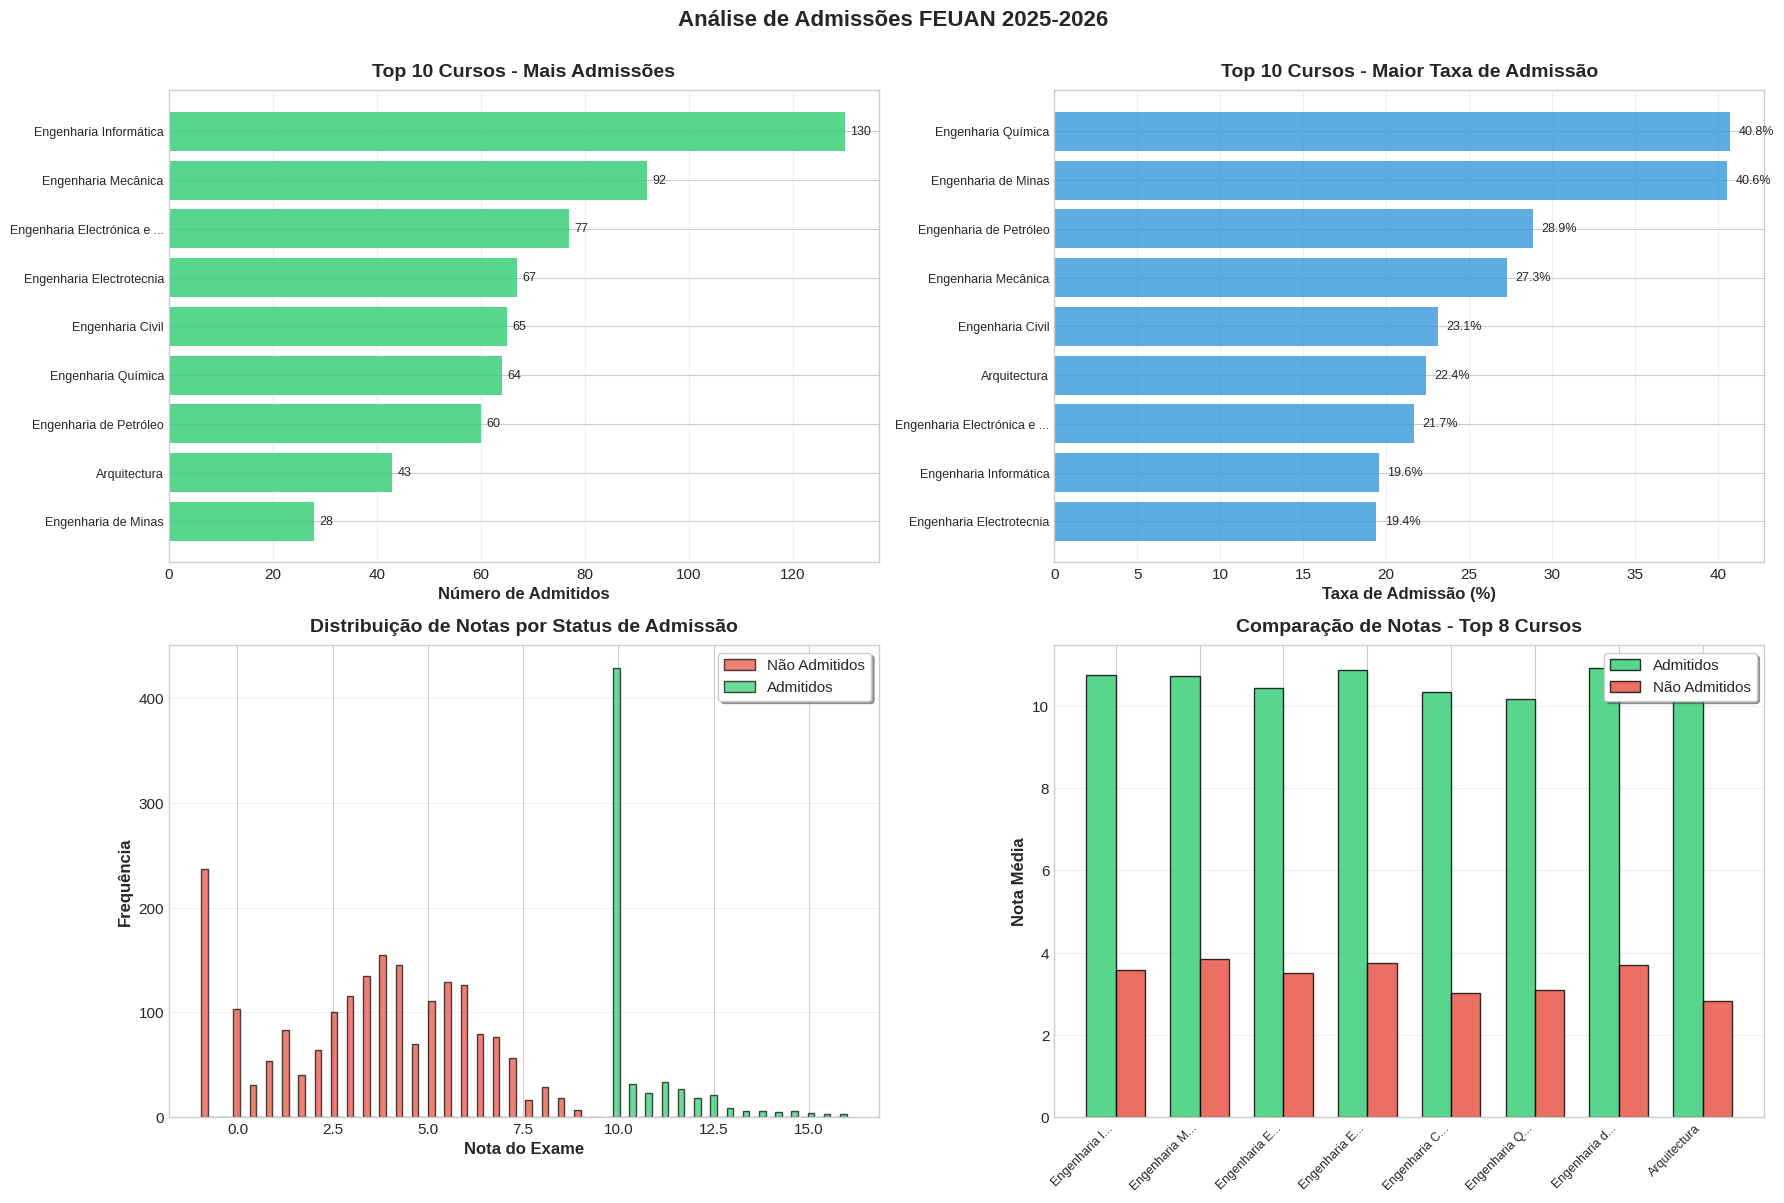

In [25]:


def criar_visualizacoes_parte1(df: pd.DataFrame, df_cursos: pd.DataFrame) -> None:
    """
    Cria visualizações principais - Parte 1.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com dados originais
    df_cursos : pd.DataFrame
        DataFrame com análise por curso
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Análise de Admissões FEUAN 2025-2026', fontsize=16, fontweight='bold', y=1.00)
    
    # 1. Top 10 cursos por admissões
    ax1 = axes[0, 0]
    top10_adm = df_cursos.head(10)
    ax1.barh(range(len(top10_adm)), top10_adm['Admitidos'], color='#2ecc71', alpha=0.8)
    ax1.set_yticks(range(len(top10_adm)))
    ax1.set_yticklabels([c[:25] + '...' if len(c) > 25 else c for c in top10_adm['Curso']], fontsize=9)
    ax1.set_xlabel('Número de Admitidos', fontweight='bold')
    ax1.set_title('Top 10 Cursos - Mais Admissões', fontweight='bold', pad=10)
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(top10_adm['Admitidos']):
        ax1.text(v + 1, i, str(int(v)), va='center', fontsize=9)
    
    # 2. Taxa de admissão por curso
    ax2 = axes[0, 1]
    top10_taxa = df_cursos.nlargest(10, 'Taxa_Admissao_%')
    ax2.barh(range(len(top10_taxa)), top10_taxa['Taxa_Admissao_%'], color='#3498db', alpha=0.8)
    ax2.set_yticks(range(len(top10_taxa)))
    ax2.set_yticklabels([c[:25] + '...' if len(c) > 25 else c for c in top10_taxa['Curso']], fontsize=9)
    ax2.set_xlabel('Taxa de Admissão (%)', fontweight='bold')
    ax2.set_title('Top 10 Cursos - Maior Taxa de Admissão', fontweight='bold', pad=10)
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(top10_taxa['Taxa_Admissao_%']):
        ax2.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)
    
    # 3. Distribuição de notas
    ax3 = axes[1, 0]
    admitidos = df[df['Admissão'] == 'Sim']['Nota do Exame de Acesso'].dropna()
    nao_admitidos = df[df['Admissão'] == 'Não']['Nota do Exame de Acesso'].dropna()
    
    ax3.hist([nao_admitidos, admitidos], bins=40, label=['Não Admitidos', 'Admitidos'], 
             color=['#e74c3c', '#2ecc71'], alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Nota do Exame', fontweight='bold')
    ax3.set_ylabel('Frequência', fontweight='bold')
    ax3.set_title('Distribuição de Notas por Status de Admissão', fontweight='bold', pad=10)
    ax3.legend(frameon=True, shadow=True)
    ax3.grid(axis='y', alpha=0.3)
    
    # 4. Comparação de notas (Top 8 cursos)
    ax4 = axes[1, 1]
    top8 = df_cursos.head(8)
    x = np.arange(len(top8))
    width = 0.35
    
    bars1 = ax4.bar(x - width/2, top8['Nota_Media_Admitidos'], width, 
                    label='Admitidos', color='#2ecc71', alpha=0.8, edgecolor='black')
    bars2 = ax4.bar(x + width/2, top8['Nota_Media_Nao_Admitidos'], width, 
                    label='Não Admitidos', color='#e74c3c', alpha=0.8, edgecolor='black')
    
    ax4.set_xticks(x)
    ax4.set_xticklabels([c[:12] + '...' if len(c) > 12 else c for c in top8['Curso']], 
                        rotation=45, ha='right', fontsize=9)
    ax4.set_ylabel('Nota Média', fontweight='bold')
    ax4.set_title('Comparação de Notas - Top 8 Cursos', fontweight='bold', pad=10)
    ax4.legend(frameon=True, shadow=True)
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('analise_admissoes_parte1.png', dpi=300, bbox_inches='tight')
    print("\n✅ Gráficos (Parte 1) salvos em 'analise_admissoes_parte1.png'")
    plt.show()


# Criar visualizações parte 1
if df is not None and 'df_cursos' in locals():
    criar_visualizacoes_parte1(df, df_cursos)



### BLOCO 9: VISUALIZAÇÕES - PARTE 2


✅ Gráficos (Parte 2) salvos em 'analise_admissoes_parte2.png'


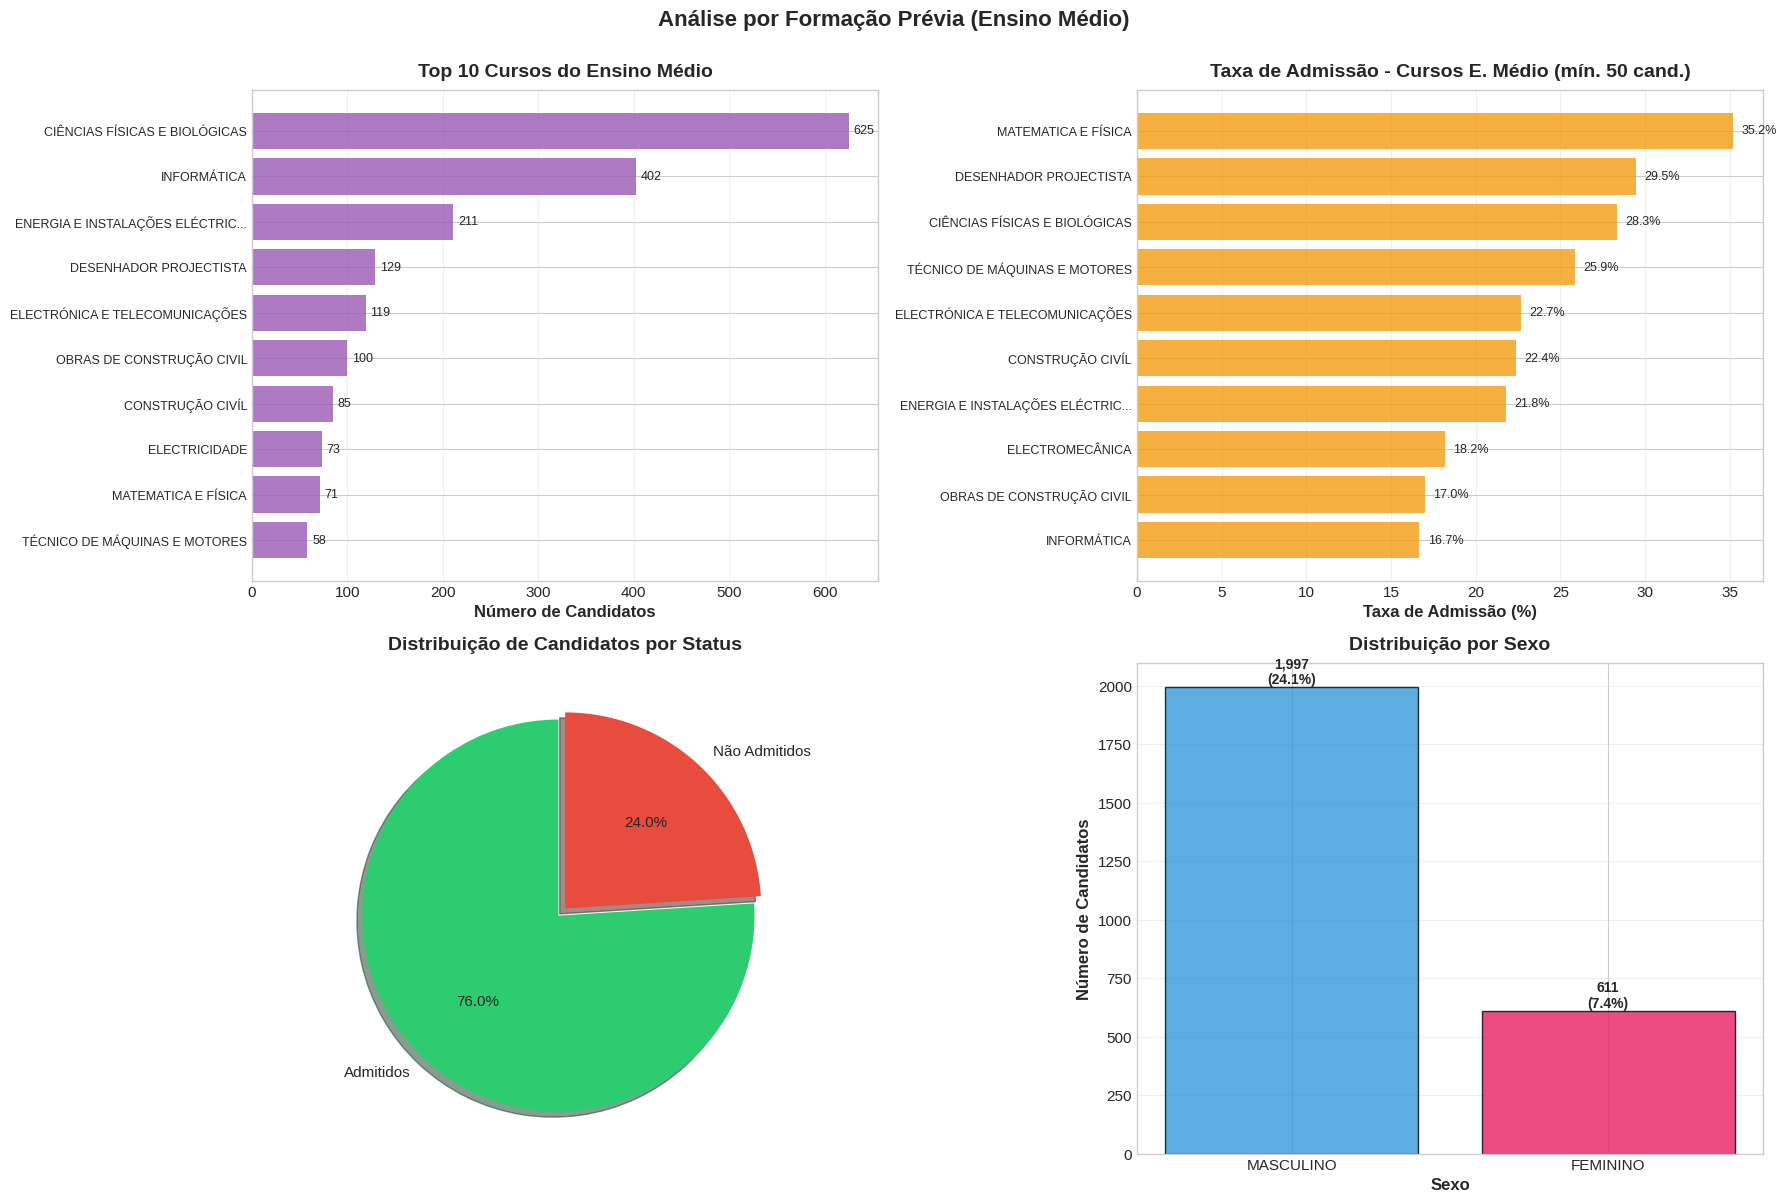

In [26]:

def criar_visualizacoes_parte2(df: pd.DataFrame, df_cursos_medio: pd.DataFrame) -> None:
    """
    Cria visualizações principais - Parte 2.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com dados originais
    df_cursos_medio : pd.DataFrame
        DataFrame com análise por curso do ensino médio
    """
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Análise por Formação Prévia (Ensino Médio)', fontsize=16, fontweight='bold', y=1.00)
    
    # 1. Top cursos do ensino médio
    ax1 = axes[0, 0]
    top10_medio = df_cursos_medio.head(10)
    ax1.barh(range(len(top10_medio)), top10_medio['Total_Candidatos'], color='#9b59b6', alpha=0.8)
    ax1.set_yticks(range(len(top10_medio)))
    ax1.set_yticklabels([c[:30] + '...' if len(c) > 30 else c for c in top10_medio['Curso_Medio']], fontsize=9)
    ax1.set_xlabel('Número de Candidatos', fontweight='bold')
    ax1.set_title('Top 10 Cursos do Ensino Médio', fontweight='bold', pad=10)
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(top10_medio['Total_Candidatos']):
        ax1.text(v + 5, i, str(int(v)), va='center', fontsize=9)
    
    # 2. Taxa de admissão por curso do ensino médio
    ax2 = axes[0, 1]
    medio_filtrado = df_cursos_medio[df_cursos_medio['Total_Candidatos'] >= 50].nlargest(10, 'Taxa_Admissao_%')
    ax2.barh(range(len(medio_filtrado)), medio_filtrado['Taxa_Admissao_%'], color='#f39c12', alpha=0.8)
    ax2.set_yticks(range(len(medio_filtrado)))
    ax2.set_yticklabels([c[:30] + '...' if len(c) > 30 else c for c in medio_filtrado['Curso_Medio']], fontsize=9)
    ax2.set_xlabel('Taxa de Admissão (%)', fontweight='bold')
    ax2.set_title('Taxa de Admissão - Cursos E. Médio (mín. 50 cand.)', fontweight='bold', pad=10)
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(medio_filtrado['Taxa_Admissao_%']):
        ax2.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)
    
    # 3. Status de admissão (Pizza)
    ax3 = axes[1, 0]
    admissao_counts = df['Admissão'].value_counts()
    colors = ['#2ecc71', '#e74c3c']
    explode = (0.05, 0)
    
    ax3.pie(admissao_counts, labels=['Admitidos', 'Não Admitidos'], autopct='%1.1f%%',
            colors=colors, explode=explode, shadow=True, startangle=90)
    ax3.set_title('Distribuição de Candidatos por Status', fontweight='bold', pad=10)
    
    # 4. Distribuição por sexo
    ax4 = axes[1, 1]
    sexo_counts = df['Sexo'].value_counts()
    colors_sexo = ['#3498db', '#e91e63']
    
    bars = ax4.bar(sexo_counts.index, sexo_counts.values, color=colors_sexo, alpha=0.8, edgecolor='black')
    ax4.set_xlabel('Sexo', fontweight='bold')
    ax4.set_ylabel('Número de Candidatos', fontweight='bold')
    ax4.set_title('Distribuição por Sexo', fontweight='bold', pad=10)
    ax4.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('analise_admissoes_parte2.png', dpi=300, bbox_inches='tight')
    print("✅ Gráficos (Parte 2) salvos em 'analise_admissoes_parte2.png'")
    plt.show()


# Criar visualizações parte 2
if df is not None and 'df_cursos_medio' in locals():
    criar_visualizacoes_parte2(df, df_cursos_medio)


### BLOCO 10: ANÁLISE DE CORRELAÇÃO NOTA vs ADMISSÃO



📈 ANÁLISE DE CORRELAÇÃO: NOTA vs ADMISSÃO

📊 TAXA DE ADMISSÃO POR FAIXA DE NOTA:

Faixa 0-5:   0.00% (   0/ 1050 candidatos)
Faixa 5-7:   0.00% (   0/  442 candidatos)
Faixa 7-9:   0.00% (   0/  150 candidatos)
Faixa 9-11: 100.00% ( 499/  499 candidatos)
Faixa 11-13: 100.00% (  94/   94 candidatos)
Faixa 13-20: 100.00% (  33/   33 candidatos)

✅ Gráfico salvo em 'correlacao_nota_admissao.png'


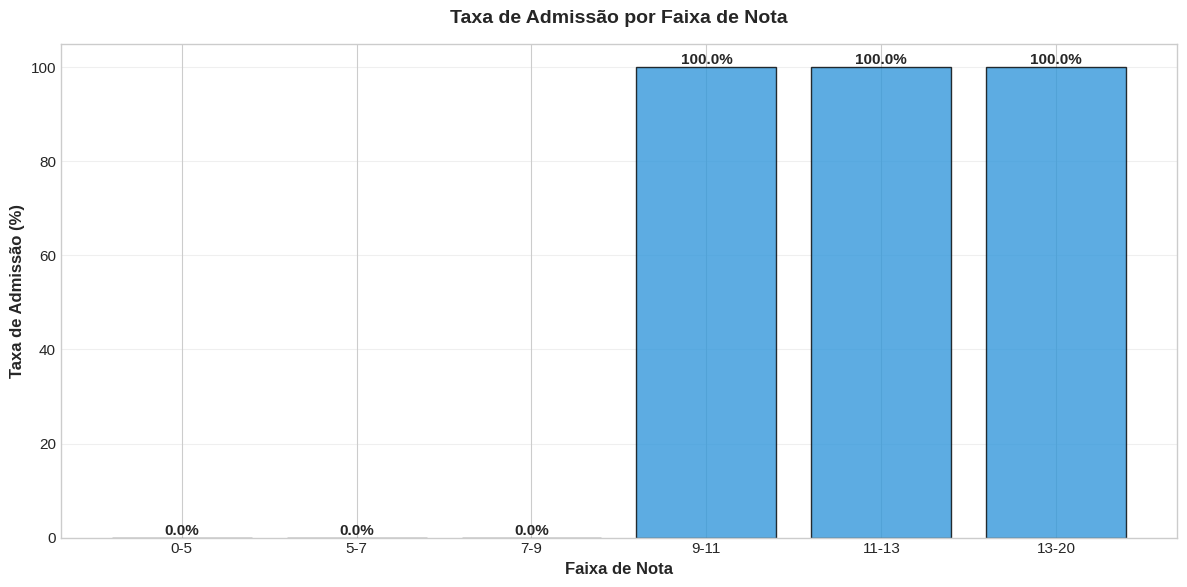

In [ ]:


def analisar_correlacao_nota_admissao(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analisa a correlação entre faixas de nota e taxa de admissão.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com análise por faixa de nota
    """
    print(f"\n{'='*70}")
    print(" ANÁLISE DE CORRELAÇÃO: NOTA vs ADMISSÃO")
    print(f"{'='*70}\n")
    
    # Limpar dados
    df_clean = df.dropna(subset=['Nota do Exame de Acesso', 'Admissão'])
    
    # Definir faixas de nota
    bins = [0, 5, 7, 9, 11, 13, 20]
    labels = ['0-5', '5-7', '7-9', '9-11', '11-13', '13-20']
    
    df_clean['Faixa_Nota'] = pd.cut(df_clean['Nota do Exame de Acesso'], 
                                     bins=bins, labels=labels)
    
    # Calcular estatísticas por faixa
    analise_faixas = df_clean.groupby('Faixa_Nota', observed=True).agg({
        'Admissão': [
            'count',
            lambda x: (x == 'Sim').sum(),
            lambda x: (x == 'Sim').sum() / len(x) * 100
        ]
    }).reset_index()
    
    analise_faixas.columns = ['Faixa_Nota', 'Total', 'Admitidos', 'Taxa_Admissao_%']
    analise_faixas['Taxa_Admissao_%'] = analise_faixas['Taxa_Admissao_%'].round(2)
    
    # Exibir resultados
    print(" TAXA DE ADMISSÃO POR FAIXA DE NOTA:\n")
    for _, row in analise_faixas.iterrows():
        print(f"Faixa {row['Faixa_Nota']}: {row['Taxa_Admissao_%']:6.2f}% " +
              f"({int(row['Admitidos']):4}/{int(row['Total']):5} candidatos)")
    
    # Criar visualização
    plt.figure(figsize=(12, 6))
    bars = plt.bar(analise_faixas['Faixa_Nota'].astype(str), 
                   analise_faixas['Taxa_Admissao_%'], 
                   color='#3498db', alpha=0.8, edgecolor='black')
    
    plt.xlabel('Faixa de Nota', fontweight='bold', fontsize=12)
    plt.ylabel('Taxa de Admissão (%)', fontweight='bold', fontsize=12)
    plt.title('Taxa de Admissão por Faixa de Nota', fontweight='bold', fontsize=14, pad=15)
    plt.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('correlacao_nota_admissao.png', dpi=300, bbox_inches='tight')
    print("\n✅ Gráfico salvo em 'correlacao_nota_admissao.png'")
    plt.show()
    
    return analise_faixas


# Executar análise de correlação
if df is not None:
    df_correlacao = analisar_correlacao_nota_admissao(df)



### BLOCO 11: MATRIZ DE TRANSIÇÃO (ENSINO MÉDIO → SUPERIOR)



🔄 MATRIZ DE TRANSIÇÃO: ENSINO MÉDIO → ENSINO SUPERIOR

Matriz de Transição (Top 8 x Top 8):



Nome do Curso Inscrito no Ensino Superior,Arquitectura,Engenharia Civil,Engenharia Electrotecnia,Engenharia Electrónica e Telecomunicações,Engenharia Informática,Engenharia Mecânica,Engenharia Química,Engenharia de Petróleo,All
Nome do Curso do Ensino Médio,,,,,,,,,
CIÊNCIAS FÍSICAS E BIOLÓGICAS,28,48,36,68,190,79,63,89,601
CONSTRUÇÃO CIVÍL,9,73,0,0,1,0,0,2,85
DESENHADOR PROJECTISTA,91,33,0,0,3,0,0,1,128
ELECTRICIDADE,2,6,43,12,3,6,0,1,73
ELECTRÓNICA E TELECOMUNICAÇÕES,0,0,7,98,10,1,0,1,117
ENERGIA E INSTALAÇÕES ELÉCTRICAS,1,5,139,34,11,13,1,4,208
INFORMÁTICA,2,5,6,47,331,5,3,2,401
OBRAS DE CONSTRUÇÃO CIVIL,22,77,0,0,1,0,0,0,100
All,155,247,231,259,550,104,67,100,1713



✅ Matriz de transição salva em 'matriz_transicao.png'


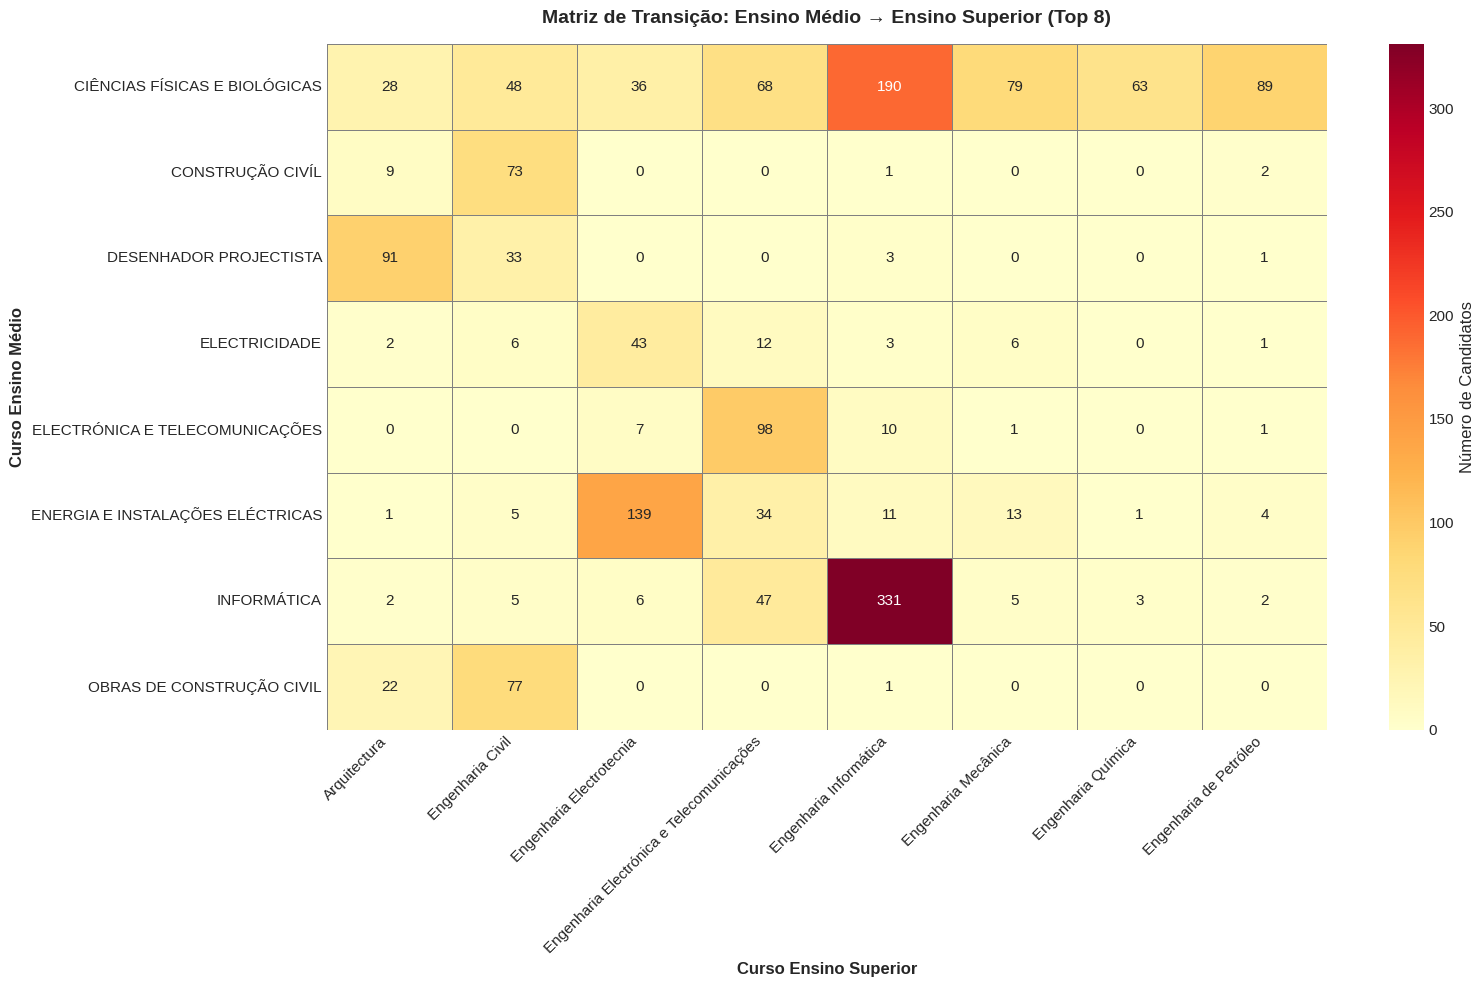

In [28]:


def analisar_matriz_transicao(df: pd.DataFrame, top_n: int = 10) -> pd.DataFrame:
    """
    Cria matriz de transição entre cursos do ensino médio e superior.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
    top_n : int
        Número de cursos top a considerar
        
    Returns:
    --------
    pd.DataFrame
        Matriz de transição
    """
    print(f"\n{'='*70}")
    print("🔄 MATRIZ DE TRANSIÇÃO: ENSINO MÉDIO → ENSINO SUPERIOR")
    print(f"{'='*70}\n")
    
    # Selecionar top cursos
    cursos_medio_top = df['Nome do Curso do Ensino Médio'].value_counts().head(top_n).index
    cursos_superior_top = df['Nome do Curso Inscrito no Ensino Superior'].value_counts().head(top_n).index
    
    # Filtrar dados
    df_filtrado = df[
        (df['Nome do Curso do Ensino Médio'].isin(cursos_medio_top)) &
        (df['Nome do Curso Inscrito no Ensino Superior'].isin(cursos_superior_top))
    ]
    
    # Criar matriz de transição
    matriz = pd.crosstab(
        df_filtrado['Nome do Curso do Ensino Médio'],
        df_filtrado['Nome do Curso Inscrito no Ensino Superior'],
        margins=True
    )
    
    print(f"Matriz de Transição (Top {top_n} x Top {top_n}):\n")
    display(matriz)
    
    # Criar heatmap
    plt.figure(figsize=(16, 10))
    
    # Remover a linha e coluna 'All' para o heatmap
    matriz_plot = matriz.iloc[:-1, :-1]
    
    sns.heatmap(matriz_plot, annot=True, fmt='d', cmap='YlOrRd', 
                cbar_kws={'label': 'Número de Candidatos'},
                linewidths=0.5, linecolor='gray')
    
    plt.title(f'Matriz de Transição: Ensino Médio → Ensino Superior (Top {top_n})', 
              fontweight='bold', fontsize=14, pad=15)
    plt.xlabel('Curso Ensino Superior', fontweight='bold', fontsize=12)
    plt.ylabel('Curso Ensino Médio', fontweight='bold', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('matriz_transicao.png', dpi=300, bbox_inches='tight')
    print("\n✅ Matriz de transição salva em 'matriz_transicao.png'")
    plt.show()
    
    return matriz


# Executar análise de matriz de transição
if df is not None:
    matriz_transicao = analisar_matriz_transicao(df, top_n=8)


### BLOCO 12: ANÁLISE DETALHADA POR CURSO ESPECÍFICO


In [ ]:


def analisar_curso_especifico(df: pd.DataFrame, nome_curso: str) -> None:
    """
    Realiza análise detalhada de um curso específico.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
    nome_curso : str
        Nome do curso a analisar
    """
    df_curso = df[df['Nome do Curso Inscrito no Ensino Superior'] == nome_curso]
    
    if len(df_curso) == 0:
        print(f" Curso '{nome_curso}' não encontrado!")
        return
    
    print(f"\n{'='*70}")
    print(f"🎯 ANÁLISE DETALHADA: {nome_curso}")
    print(f"{'='*70}\n")
    
    # Estatísticas gerais
    total = len(df_curso)
    admitidos = (df_curso['Admissão'] == 'Sim').sum()
    nao_admitidos = total - admitidos
    taxa = (admitidos / total * 100)
    
    print(f" ESTATÍSTICAS GERAIS:")
    print(f"   Total de Candidatos: {total:,}")
    print(f"   Admitidos: {admitidos:,} ({taxa:.2f}%)")
    print(f"   Não Admitidos: {nao_admitidos:,} ({100-taxa:.2f}%)")
    
    # Estatísticas de notas
    notas_geral = df_curso['Nota do Exame de Acesso'].dropna()
    notas_adm = df_curso[df_curso['Admissão'] == 'Sim']['Nota do Exame de Acesso'].dropna()
    notas_nao = df_curso[df_curso['Admissão'] == 'Não']['Nota do Exame de Acesso'].dropna()
    
    print(f"\n NOTAS:")
    print(f"   Média Geral: {notas_geral.mean():.2f}")
    print(f"   Média (Admitidos): {notas_adm.mean():.2f}")
    print(f"   Média (Não Admitidos): {notas_nao.mean():.2f}")
    print(f"   Mínima (Admitidos): {notas_adm.min():.2f}")
    print(f"   Máxima (Admitidos): {notas_adm.max():.2f}")
    
    # Perfil demográfico
    masculino = (df_curso['Sexo'] == 'MASCULINO').sum()
    feminino = (df_curso['Sexo'] == 'FEMININO').sum()
    idade_media = df_curso['Idade'].mean()
    
    print(f"\n PERFIL DEMOGRÁFICO:")
    print(f"   Masculino: {masculino:,} ({masculino/total*100:.1f}%)")
    print(f"   Feminino: {feminino:,} ({feminino/total*100:.1f}%)")
    print(f"   Idade Média: {idade_media:.1f} anos")
    
    # Top 5 cursos do ensino médio
    print(f"\n TOP 5 CURSOS DO ENSINO MÉDIO (Origem):")
    top_cursos_origem = df_curso['Nome do Curso do Ensino Médio'].value_counts().head(5)
    
    for idx, (curso, count) in enumerate(top_cursos_origem.items(), 1):
        adm_curso = df_curso[
            (df_curso['Nome do Curso do Ensino Médio'] == curso) & 
            (df_curso['Admissão'] == 'Sim')
        ].shape[0]
        taxa_curso = (adm_curso / count * 100) if count > 0 else 0
        
        print(f"\n   {idx}. {curso}")
        print(f"      Total: {count} | Admitidos: {adm_curso} | Taxa: {taxa_curso:.1f}%")
    
    # Top 5 escolas
    print(f"\n TOP 5 ESCOLAS DE PROVENIÊNCIA:")
    top_escolas = df_curso['Procedência Escolar do Ensino Médio'].value_counts().head(5)
    
    for idx, (escola, count) in enumerate(top_escolas.items(), 1):
        escola_nome = escola[:55] + '...' if len(escola) > 55 else escola
        print(f"   {idx}. {escola_nome}")
        print(f"      Candidatos: {count}")
    
    print(f"\n{'='*70}\n")


# Exemplo de uso - Descomente para analisar curso específico
# analisar_curso_especifico(df, 'Engenharia Informática')


### BLOCO 13: COMPARAÇÃO ENTRE CURSOS


In [44]:


def comparar_cursos(df: pd.DataFrame, lista_cursos: list) -> pd.DataFrame:
    """
    Compara múltiplos cursos lado a lado.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com os dados
    lista_cursos : list
        Lista de nomes de cursos a comparar
        
    Returns:
    --------
    pd.DataFrame
        DataFrame com comparação
    """
    print(f"\n{'='*70}")
    print("🔍 COMPARAÇÃO ENTRE CURSOS")
    print(f"{'='*70}\n")
    
    comparacao = []
    
    for curso in lista_cursos:
        df_curso = df[df['Nome do Curso Inscrito no Ensino Superior'] == curso]
        
        if len(df_curso) > 0:
            total = len(df_curso)
            admitidos = (df_curso['Admissão'] == 'Sim').sum()
            taxa = (admitidos / total * 100)
            
            notas_adm = df_curso[df_curso['Admissão'] == 'Sim']['Nota do Exame de Acesso'].dropna()
            
            comparacao.append({
                'Curso': curso,
                'Total_Candidatos': total,
                'Admitidos': admitidos,
                'Taxa_Admissao_%': round(taxa, 2),
                'Nota_Media_Admitidos': round(notas_adm.mean(), 2) if len(notas_adm) > 0 else np.nan,
                'Nota_Min_Admitidos': round(notas_adm.min(), 2) if len(notas_adm) > 0 else np.nan,
                'Nota_Max_Admitidos': round(notas_adm.max(), 2) if len(notas_adm) > 0 else np.nan
            })
    
    df_comparacao = pd.DataFrame(comparacao)
    
    print("Comparação de Cursos:\n")
    display(df_comparacao)
    
    # Visualização comparativa
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Total e Admitidos
    ax1 = axes[0]
    x = np.arange(len(df_comparacao))
    width = 0.35
    
    ax1.bar(x - width/2, df_comparacao['Total_Candidatos'], width, 
            label='Total', color='#3498db', alpha=0.8)
    ax1.bar(x + width/2, df_comparacao['Admitidos'], width, 
            label='Admitidos', color='#2ecc71', alpha=0.8)
    
    ax1.set_xlabel('Curso', fontweight='bold')
    ax1.set_ylabel('Número de Candidatos', fontweight='bold')
    ax1.set_title('Candidatos: Total vs Admitidos', fontweight='bold', pad=10)
    ax1.set_xticks(x)
    ax1.set_xticklabels([c[:15] + '...' if len(c) > 15 else c for c in df_comparacao['Curso']], 
                        rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    
    # Gráfico 2: Taxa de Admissão
    ax2 = axes[1]
    ax2.bar(range(len(df_comparacao)), df_comparacao['Taxa_Admissao_%'], 
            color='#f39c12', alpha=0.8, edgecolor='black')
    ax2.set_xlabel('Curso', fontweight='bold')
    ax2.set_ylabel('Taxa de Admissão (%)', fontweight='bold')
    ax2.set_title('Taxa de Admissão por Curso', fontweight='bold', pad=10)
    ax2.set_xticks(range(len(df_comparacao)))
    ax2.set_xticklabels([c[:15] + '...' if len(c) > 15 else c for c in df_comparacao['Curso']], 
                        rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3)
    
    # Adicionar valores
    for i, v in enumerate(df_comparacao['Taxa_Admissao_%']):
        ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('comparacao_cursos.png', dpi=300, bbox_inches='tight')
    print("\n✅ Gráfico salvo em 'comparacao_cursos.png'")
    plt.show()
    
    return df_comparacao


# Exemplo de uso - Descomente para comparar cursos
# cursos_comparar = [
#     'Engenharia Informática',
#     'Engenharia Civil',
#     'Engenharia Mecânica',
#     'Engenharia Electrotecnia'
# ]
# df_comp = comparar_cursos(df, cursos_comparar)

### BLOCO 14: RELATÓRIO FINAL E INSIGHTS


In [ ]:

def gerar_relatorio_final(df: pd.DataFrame, df_cursos: pd.DataFrame) -> None:
    """
    Gera relatório final com principais insights.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com dados originais
    df_cursos : pd.DataFrame
        DataFrame com análise por curso
    """
    print(f"\n{'='*70}")
    print(" RELATÓRIO FINAL - PRINCIPAIS INSIGHTS")
    print(f"{'='*70}\n")
    
    # 1. Estatísticas Gerais
    total_candidatos = len(df)
    total_admitidos = (df['Admissão'] == 'Sim').sum()
    taxa_geral = (total_admitidos / total_candidatos * 100)
    
    nota_media_adm = df[df['Admissão'] == 'Sim']['Nota do Exame de Acesso'].mean()
    nota_media_nao = df[df['Admissão'] == 'Não']['Nota do Exame de Acesso'].mean()
    diferenca = nota_media_adm - nota_media_nao
    
    print("1️⃣ ESTATÍSTICAS GERAIS:")
    print(f"   • Total de Candidatos: {total_candidatos:,}")
    print(f"   • Total de Admitidos: {total_admitidos:,}")
    print(f"   • Taxa de Admissão Geral: {taxa_geral:.2f}%")
    print(f"   • Nota Média (Admitidos): {nota_media_adm:.2f}")
    print(f"   • Nota Média (Não Admitidos): {nota_media_nao:.2f}")
    print(f"   • Diferença de Nota: {diferenca:.2f} pontos")
    
    # 2. Curso mais procurado
    curso_mais_procurado = df_cursos.iloc[0]
    print(f"\n2️⃣ CURSO MAIS PROCURADO:")
    print(f"   • {curso_mais_procurado['Curso']}")
    print(f"   • {int(curso_mais_procurado['Total_Candidatos']):,} candidatos")
    print(f"   • {int(curso_mais_procurado['Admitidos']):,} admitidos ({curso_mais_procurado['Taxa_Admissao_%']:.1f}%)")
    
    # 3. Curso com mais admissões
    print(f"\n3️⃣ CURSO COM MAIS ADMISSÕES:")
    print(f"   • {curso_mais_procurado['Curso']}")
    print(f"   • {int(curso_mais_procurado['Admitidos']):,} admissões")
    print(f"   • Nota média dos admitidos: {curso_mais_procurado['Nota_Media_Admitidos']:.2f}")
    
    # 4. Curso com maior taxa
    curso_maior_taxa = df_cursos.nlargest(1, 'Taxa_Admissao_%').iloc[0]
    print(f"\n4️⃣ CURSO COM MAIOR TAXA DE ADMISSÃO:")
    print(f"   • {curso_maior_taxa['Curso']}")
    print(f"   • Taxa: {curso_maior_taxa['Taxa_Admissao_%']:.2f}%")
    print(f"   • {int(curso_maior_taxa['Total_Candidatos']):,} candidatos")
    
    # 5. Perfil demográfico
    masculino = (df['Sexo'] == 'MASCULINO').sum()
    feminino = (df['Sexo'] == 'FEMININO').sum()
    
    print(f"\n5️⃣ PERFIL DEMOGRÁFICO:")
    print(f"   • Masculino: {masculino:,} ({masculino/total_candidatos*100:.1f}%)")
    print(f"   • Feminino: {feminino:,} ({feminino/total_candidatos*100:.1f}%)")
    print(f"   • Idade Média: {df['Idade'].mean():.1f} anos")
    
    # 6. Insights principais
    print(f"\n6️⃣ INSIGHTS PRINCIPAIS:")
    print(f"   ✓ A nota é um fator CRÍTICO: diferença de {diferenca:.2f} pontos")
    print(f"   ✓ Taxa de aprovação geral é {taxa_geral:.1f}%, indicando alta competitividade")
    print(f"   ✓ Forte desigualdade de género: {masculino/feminino:.1f}:1 (M:F)")
    print(f"   ✓ Engenharia Informática domina a procura com {int(curso_mais_procurado['Total_Candidatos']):,} candidatos")
    print(f"   ✓ Nota mínima para admissão: aproximadamente 10.00 pontos")
    
    print(f"\n{'='*70}\n")


# Gerar relatório final
if df is not None and 'df_cursos' in locals():
    gerar_relatorio_final(df, df_cursos)



📋 RELATÓRIO FINAL - PRINCIPAIS INSIGHTS

1️⃣ ESTATÍSTICAS GERAIS:
   • Total de Candidatos: 8,295
   • Total de Admitidos: 626
   • Taxa de Admissão Geral: 7.55%
   • Nota Média (Admitidos): 10.57
   • Nota Média (Não Admitidos): 3.48
   • Diferença de Nota: 7.10 pontos

2️⃣ CURSO MAIS PROCURADO:
   • Engenharia Informática
   • 664 candidatos
   • 130 admitidos (19.6%)

3️⃣ CURSO COM MAIS ADMISSÕES:
   • Engenharia Informática
   • 130 admissões
   • Nota média dos admitidos: 10.76

4️⃣ CURSO COM MAIOR TAXA DE ADMISSÃO:
   • Engenharia Química
   • Taxa: 40.76%
   • 157 candidatos

5️⃣ PERFIL DEMOGRÁFICO:
   • Masculino: 1,997 (24.1%)
   • Feminino: 611 (7.4%)
   • Idade Média: 24.5 anos

6️⃣ INSIGHTS PRINCIPAIS:
   ✓ A nota é um fator CRÍTICO: diferença de 7.10 pontos
   ✓ Taxa de aprovação geral é 7.5%, indicando alta competitividade
   ✓ Forte desigualdade de género: 3.3:1 (M:F)
   ✓ Engenharia Informática domina a procura com 664 candidatos
   ✓ Nota mínima para admissão: aproxim

### BLOCO 14: RELATÓRIO FINAL E INSIGHTS


In [ ]:



def gerar_relatorio_final(df: pd.DataFrame, df_cursos: pd.DataFrame) -> None:
    """
    Gera relatório final com principais insights.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame com dados originais
    df_cursos : pd.DataFrame
        DataFrame com análise por curso
    """
    print(f"\n{'='*70}")
    print(" RELATÓRIO FINAL - PRINCIPAIS INSIGHTS")
    print(f"{'='*70}\n")
    
    # 1. Estatísticas Gerais
    total_candidatos = len(df)
    total_admitidos = (df['Admissão'] == 'Sim').sum()
    taxa_geral = (total_admitidos / total_candidatos * 100)
    
    nota_media_adm = df[df['Admissão'] == 'Sim']['Nota do Exame de Acesso'].mean()
    nota_media_nao = df[df['Admissão'] == 'Não']['Nota do Exame de Acesso'].mean()
    diferenca = nota_media_adm - nota_media_nao
    
    print("1️⃣ ESTATÍSTICAS GERAIS:")
    print(f"   • Total de Candidatos: {total_candidatos:,}")
    print(f"   • Total de Admitidos: {total_admitidos:,}")
    print(f"   • Taxa de Admissão Geral: {taxa_geral:.2f}%")
    print(f"   • Nota Média (Admitidos): {nota_media_adm:.2f}")
    print(f"   • Nota Média (Não Admitidos): {nota_media_nao:.2f}")
    print(f"   • Diferença de Nota: {diferenca:.2f} pontos")
    
    # 2. Curso mais procurado
    curso_mais_procurado = df_cursos.iloc[0]
    print(f"\n2️⃣ CURSO MAIS PROCURADO:")
    print(f"   • {curso_mais_procurado['Curso']}")
    print(f"   • {int(curso_mais_procurado['Total_Candidatos']):,} candidatos")
    print(f"   • {int(curso_mais_procurado['Admitidos']):,} admitidos ({curso_mais_procurado['Taxa_Admissao_%']:.1f}%)")
    
    # 3. Curso com mais admissões
    print(f"\n3️⃣ CURSO COM MAIS ADMISSÕES:")
    print(f"   • {curso_mais_procurado['Curso']}")
    print(f"   • {int(curso_mais_procurado['Admitidos']):,} admissões")
    print(f"   • Nota média dos admitidos: {curso_mais_procurado['Nota_Media_Admitidos']:.2f}")
    
    # 4. Curso com maior taxa
    curso_maior_taxa = df_cursos.nlargest(1, 'Taxa_Admissao_%').iloc[0]
    print(f"\n4️⃣ CURSO COM MAIOR TAXA DE ADMISSÃO:")
    print(f"   • {curso_maior_taxa['Curso']}")
    print(f"   • Taxa: {curso_maior_taxa['Taxa_Admissao_%']:.2f}%")
    print(f"   • {int(curso_maior_taxa['Total_Candidatos']):,} candidatos")
    
    # 5. Perfil demográfico
    masculino = (df['Sexo'] == 'MASCULINO').sum()
    feminino = (df['Sexo'] == 'FEMININO').sum()
    
    print(f"\n5️⃣ PERFIL DEMOGRÁFICO:")
    print(f"   • Masculino: {masculino:,} ({masculino/total_candidatos*100:.1f}%)")
    print(f"   • Feminino: {feminino:,} ({feminino/total_candidatos*100:.1f}%)")
    print(f"   • Idade Média: {df['Idade'].mean():.1f} anos")
    
    # 6. Insights principais
    print(f"\n6️⃣ INSIGHTS PRINCIPAIS:")
    print(f"   ✓ A nota é um fator CRÍTICO: diferença de {diferenca:.2f} pontos")
    print(f"   ✓ Taxa de aprovação geral é {taxa_geral:.1f}%, indicando alta competitividade")
    print(f"   ✓ Forte desigualdade de género: {masculino/feminino:.1f}:1 (M:F)")
    print(f"   ✓ Engenharia Informática domina a procura com {int(curso_mais_procurado['Total_Candidatos']):,} candidatos")
    print(f"   ✓ Nota mínima para admissão: aproximadamente 10.00 pontos")
    
    print(f"\n{'='*70}\n")


# Gerar relatório final
if df is not None and 'df_cursos' in locals():
    gerar_relatorio_final(df, df_cursos)



📋 RELATÓRIO FINAL - PRINCIPAIS INSIGHTS

1️⃣ ESTATÍSTICAS GERAIS:
   • Total de Candidatos: 8,295
   • Total de Admitidos: 626
   • Taxa de Admissão Geral: 7.55%
   • Nota Média (Admitidos): 10.57
   • Nota Média (Não Admitidos): 3.48
   • Diferença de Nota: 7.10 pontos

2️⃣ CURSO MAIS PROCURADO:
   • Engenharia Informática
   • 664 candidatos
   • 130 admitidos (19.6%)

3️⃣ CURSO COM MAIS ADMISSÕES:
   • Engenharia Informática
   • 130 admissões
   • Nota média dos admitidos: 10.76

4️⃣ CURSO COM MAIOR TAXA DE ADMISSÃO:
   • Engenharia Química
   • Taxa: 40.76%
   • 157 candidatos

5️⃣ PERFIL DEMOGRÁFICO:
   • Masculino: 1,997 (24.1%)
   • Feminino: 611 (7.4%)
   • Idade Média: 24.5 anos

6️⃣ INSIGHTS PRINCIPAIS:
   ✓ A nota é um fator CRÍTICO: diferença de 7.10 pontos
   ✓ Taxa de aprovação geral é 7.5%, indicando alta competitividade
   ✓ Forte desigualdade de género: 3.3:1 (M:F)
   ✓ Engenharia Informática domina a procura com 664 candidatos
   ✓ Nota mínima para admissão: aproxim